# Air Lines Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_excel('Airlines+Data.xlsx',
                       index_col=0,
                       parse_dates=['Month'])
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
airline.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
airline[airline.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [ ]:
len(airline[airline.duplicated()])

16

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
airline.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

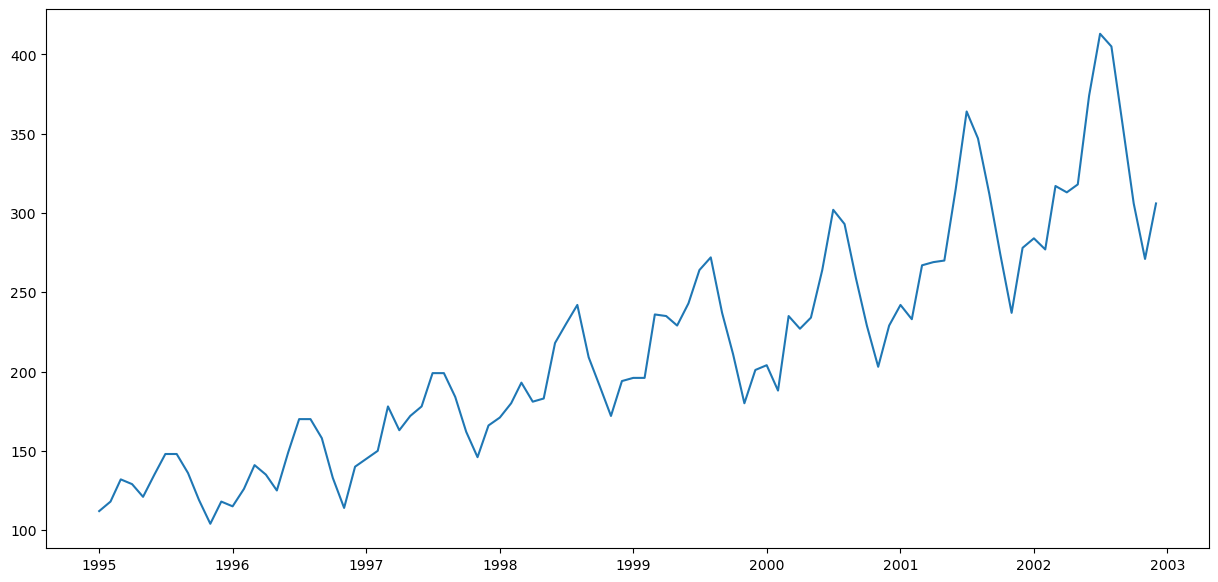

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(airline)
plt.show()

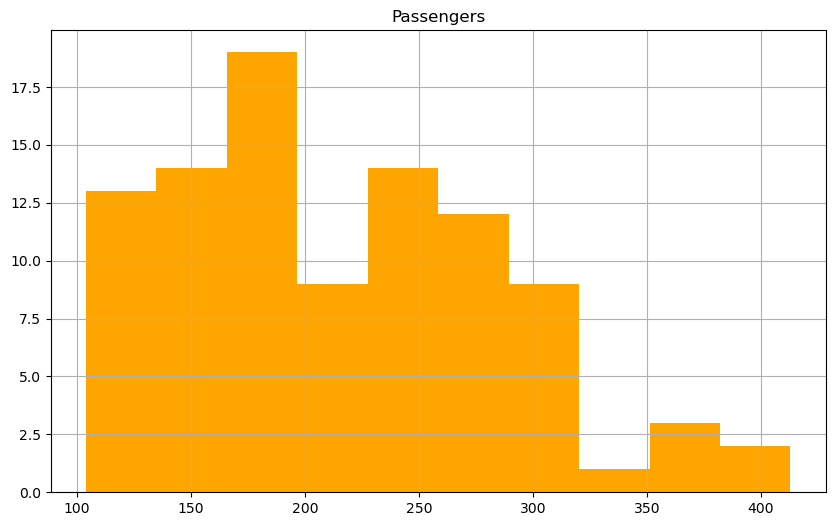

In [ ]:
airline.hist(figsize=(10,6),color = 'orange')
plt.show()

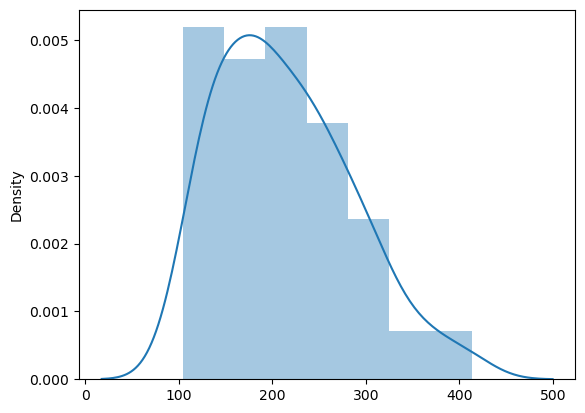

In [ ]:
sns.distplot(airline)
plt.show()

<Axes: ylabel='Density'>

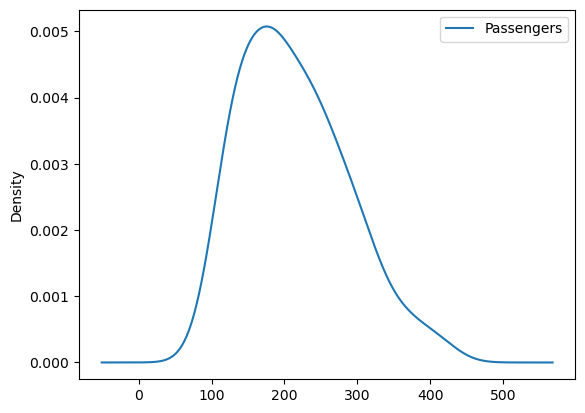

In [ ]:
airline.plot(kind='kde')

In [ ]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
airline1 = pd.read_excel('Airlines+Data.xlsx',
                         index_col=0,
                         header = 0,
                         parse_dates = True,
                         squeeze = True)
airline1


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [ ]:
type(airline1)

pandas.core.series.Series

In [ ]:
groups = airline1.groupby(pd.Grouper(freq='A'))
groups

In [ ]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<Axes: >

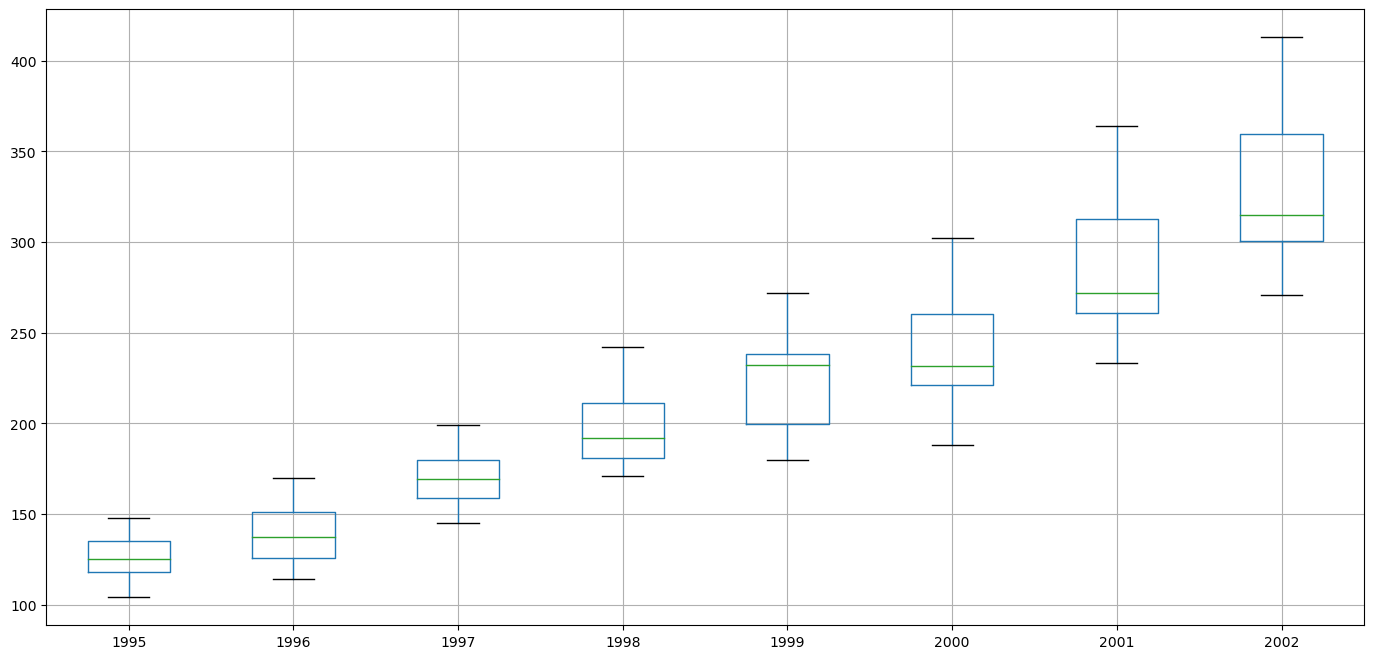

In [ ]:
plt.figure(figsize=(17,8))
years.boxplot()

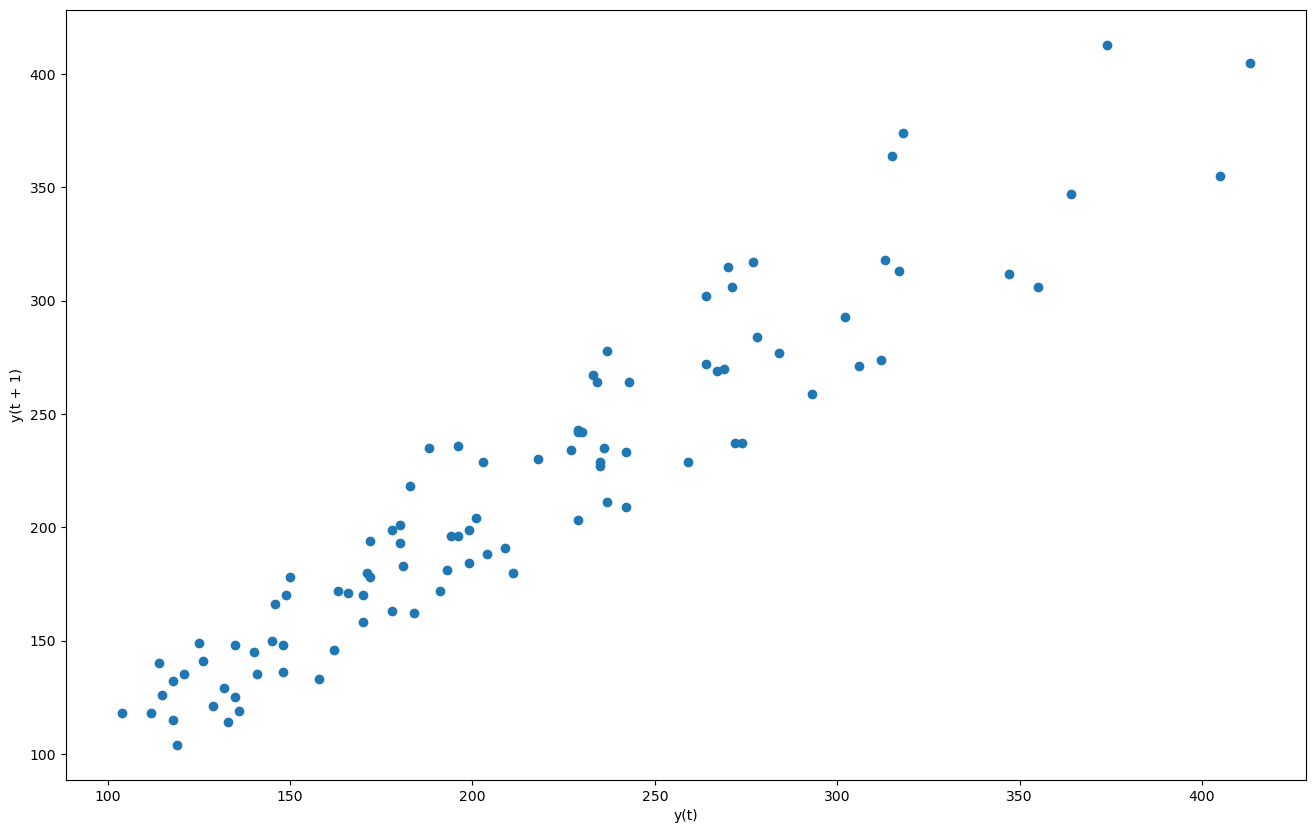

In [ ]:
plt.figure(figsize = (16,10))
pd.plotting.lag_plot(airline)
plt.show()

<Figure size 2000x1000 with 0 Axes>

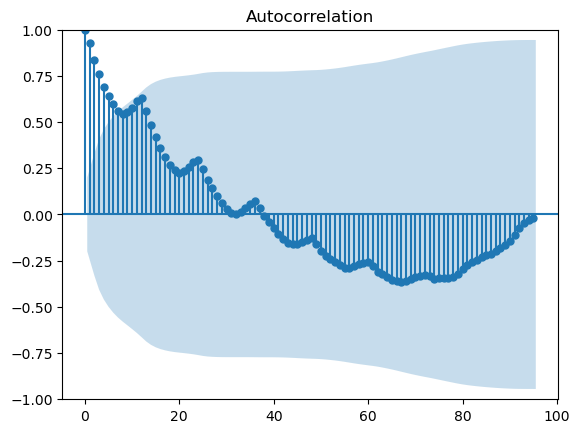

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (20,10))
plot_acf(airline, lags = 95)
plt.show()

In [ ]:
airline2 = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
airline2

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [ ]:
airline2.shape

(96,)

In [ ]:
type(airline2)

pandas.core.series.Series

In [ ]:
upsample = airline2.resample('D').mean()
upsample.head(10)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
Freq: D, Name: Passengers, dtype: float64

In [ ]:
len(upsample)

2892

In [ ]:
interpolate = upsample.interpolate(method='linear')
interpolate.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<Axes: xlabel='Month'>

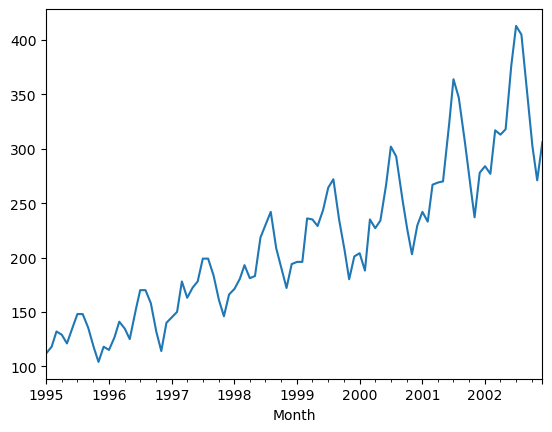

In [ ]:
interpolate.plot()

<Axes: xlabel='Month'>

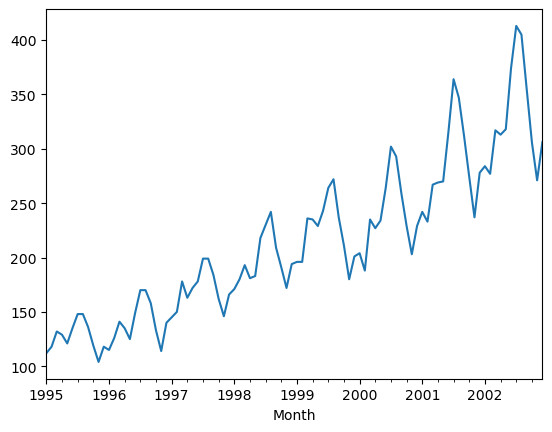

In [ ]:
airline2.plot()

In [ ]:
# Downsampling
resample = airline2.resample('Q')
quaterly_sales = resample.mean()

<Axes: xlabel='Month'>

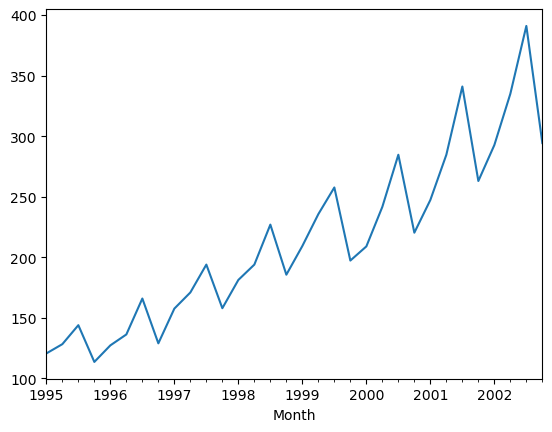

In [ ]:
quaterly_sales.plot()

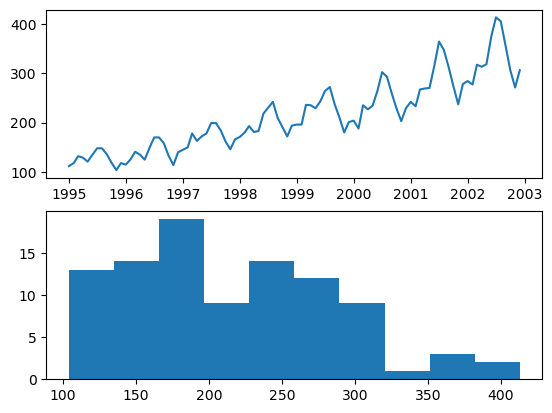

In [ ]:
# line plot
plt.subplot(211)
plt.plot(airline)

# histogram
plt.subplot(212)
plt.hist(airline)

plt.show()

In [ ]:
air_series = airline['Passengers'].array

In [ ]:
air_series

<PandasArray>
[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141,
 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 178,
 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267,
 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374,
 413, 405, 355, 306, 271, 306]
Length: 96, dtype: int64

In [ ]:
df = pd.DataFrame({'passengers':air_series})
df

,passengers
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


In [ ]:
df['log_passengers'] = np.log(airline.values)

In [ ]:
df

,passengers,log_passengers
0,112,4.718499
1,118,4.770685
2,132,4.882802
3,129,4.859812
4,121,4.795791
...,...,...
91,405,6.003887
92,355,5.872118
93,306,5.723585
94,271,5.602119


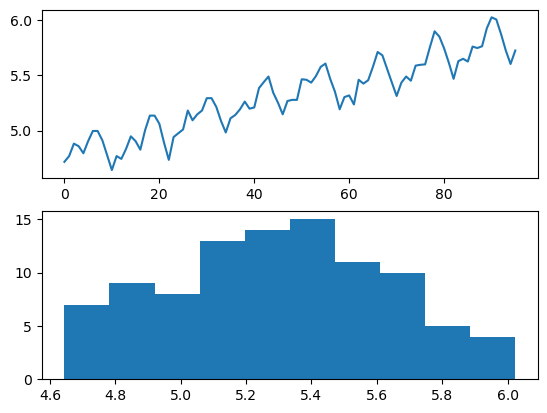

In [ ]:
plt.subplot(211)
plt.plot(df['log_passengers'])

plt.subplot(212)
plt.hist(df['log_passengers'])
plt.show()


Model Based Methods


In [ ]:
airline1.shape

(96,)

In [ ]:
airline3 = pd.read_excel("Airlines+Data.xlsx")
airline3

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
airline3['months'] = airline3['Month'].dt.strftime('%b')
airline3['year'] = airline3['Month'].dt.strftime('%Y')
airline3

,Month,Passengers,months,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<Axes: xlabel='months', ylabel='year'>

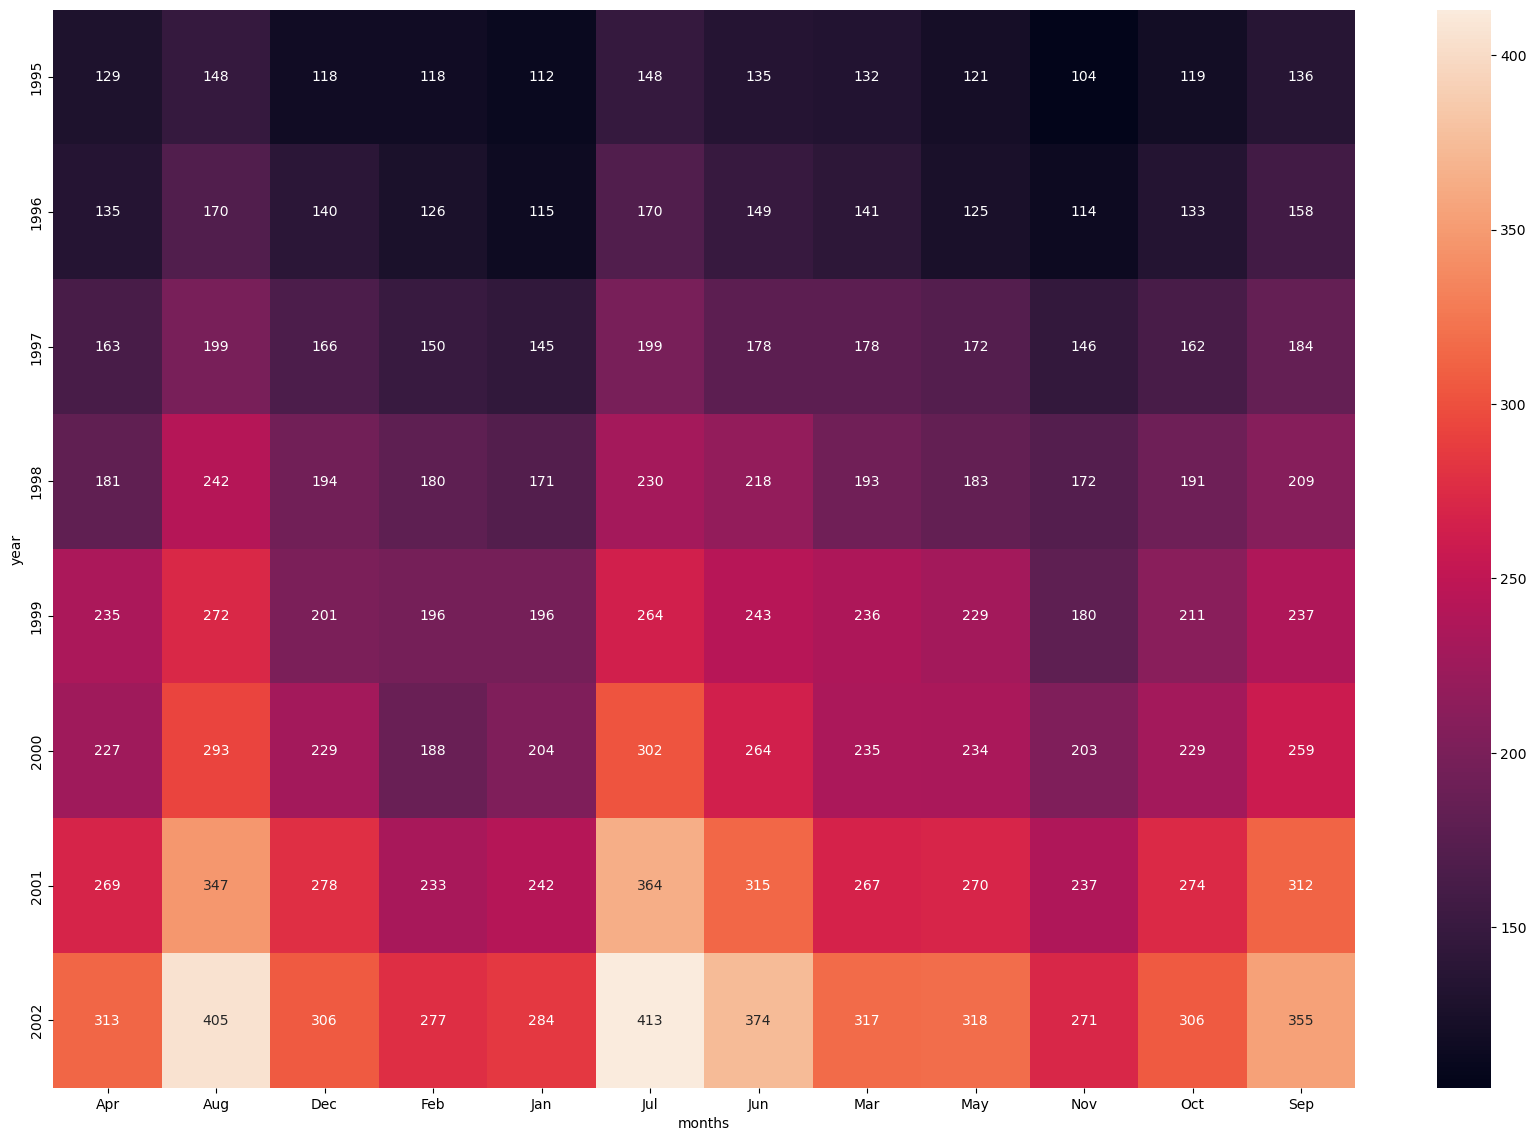

In [ ]:
plt.figure(figsize=(21,14))
pivot = pd.pivot_table(data=airline3,
                       values='Passengers',
                       index='year',
                      columns='months',
                      fill_value=0)

sns.heatmap(pivot, annot=True, fmt='g')

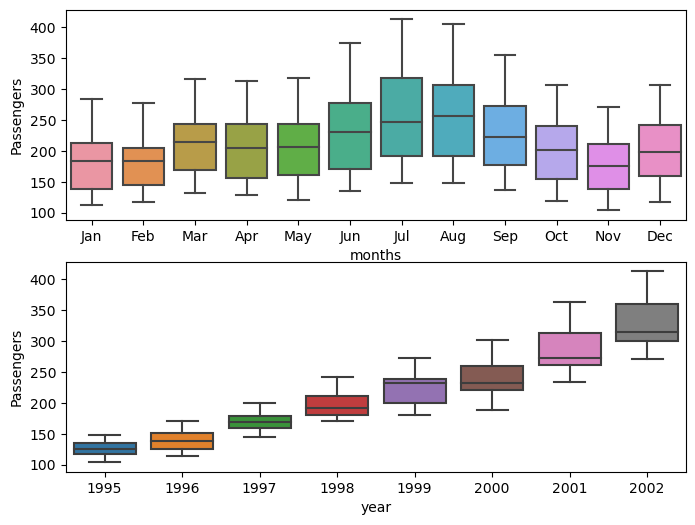

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='months',y='Passengers',data=airline3)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=airline3)
plt.show()

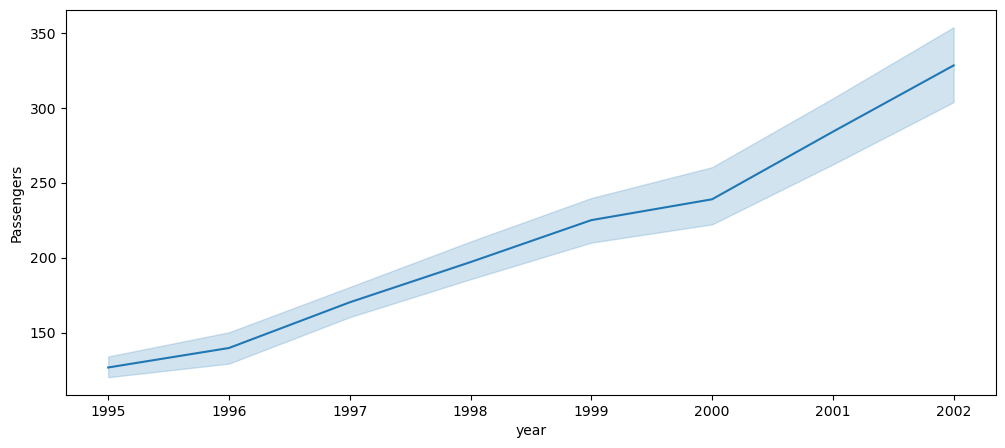

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Passengers',data=airline3)
plt.show()

In [ ]:
airline3['t'] = np.arange(1,97)
airline3['t_square'] = np.square(airline3['t'])
airline3['log_passengers'] = np.log(airline3['Passengers'])
months = pd.get_dummies(airline3['months'])

In [ ]:
airline3

,Month,Passengers,months,year,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [ ]:
airline3= pd.concat([airline3,months],axis=1)
airline3

,Month,Passengers,months,year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


Splitting Data

In [ ]:
Train = airline3.head(80)
Test = airline3.tail(16)

In [ ]:
Test

,Month,Passengers,months,year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,Dec,2001,84,7056,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Linear model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=airline3).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

44.88584239937148

In [ ]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334339

In [ ]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584207

In [ ]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443316

In [ ]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570106776

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621127

In [ ]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023030563

In [ ]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,44.885842
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [ ]:
# Build the model on entrie data set
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airline3).fit()

In [ ]:
pred_new = pd.Series(model_full.predict(airline3))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [ ]:
airline3['forecasted_Passengers'] = pd.Series(np.exp(pred_new))

<Axes: >

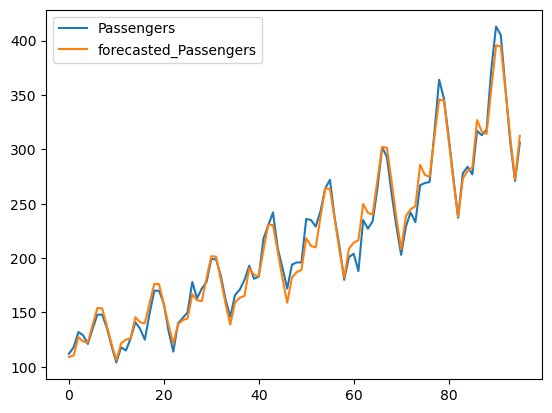

In [ ]:
airline3[['Passengers','forecasted_Passengers']].reset_index(drop = True).plot()

In [ ]:
airline4 = pd.read_excel('Airlines+Data.xlsx')
Train = airline4.head(82)
Test = airline4.tail(14)


In [ ]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312


In [ ]:
Test

,Month,Passengers
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405


Moving Average

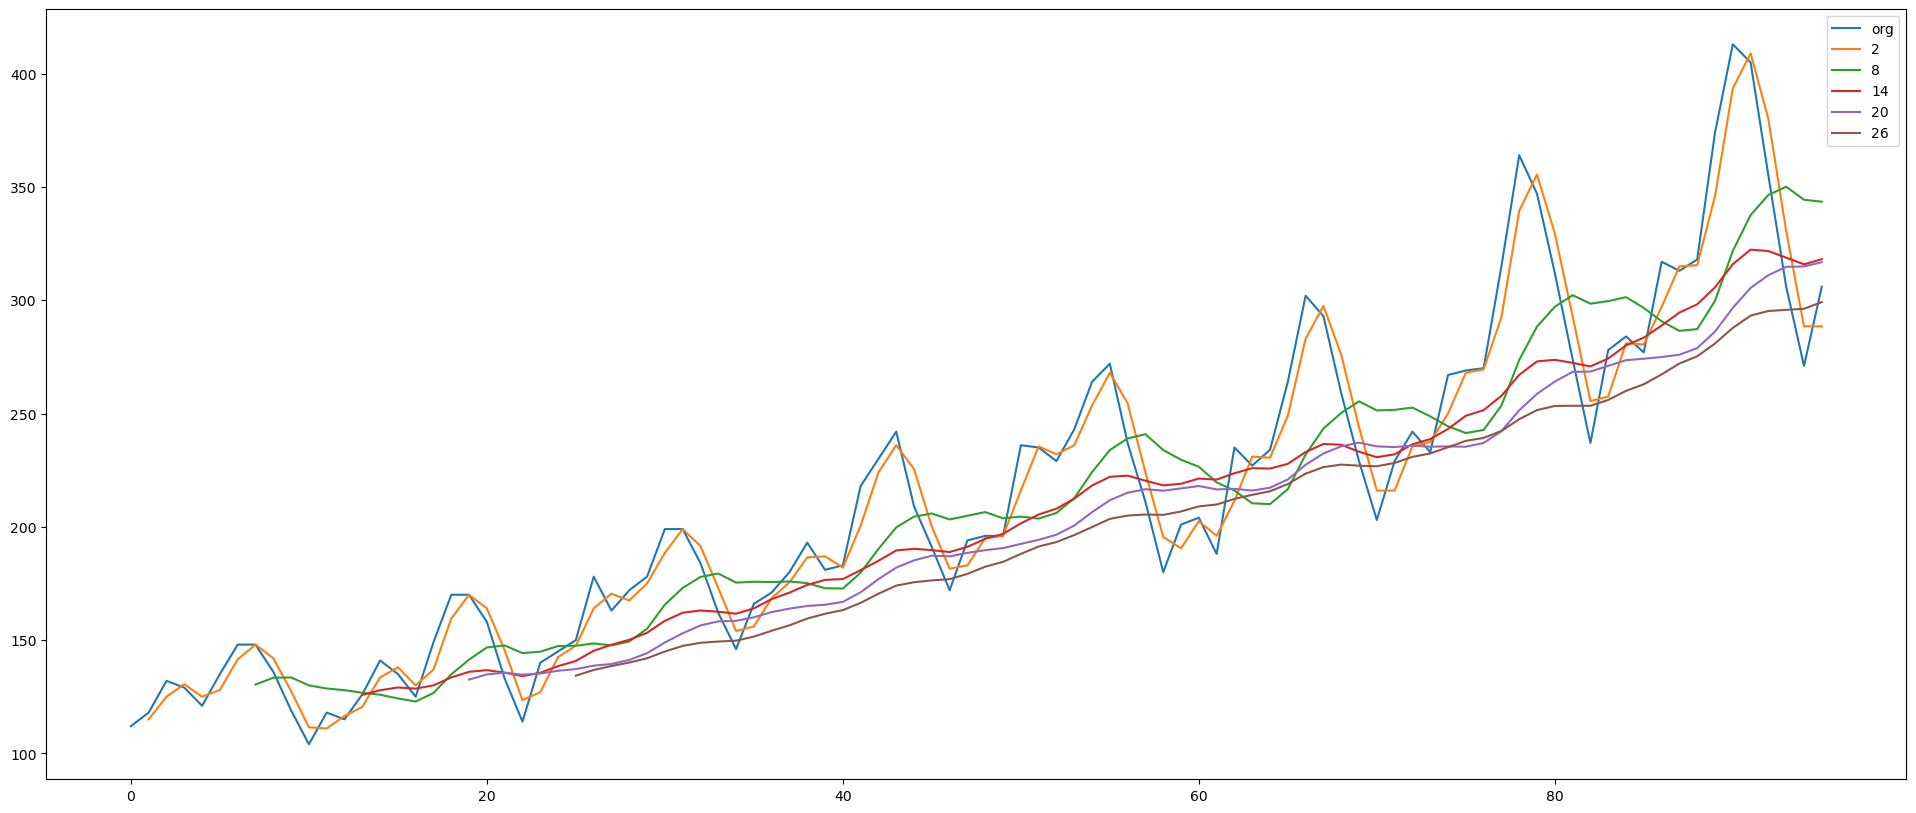

In [ ]:
plt.figure(figsize = (24,10))
airline4['Passengers'].plot(label='org')
for i in range(2,30,6):
    airline4['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time Series Decomposition plot

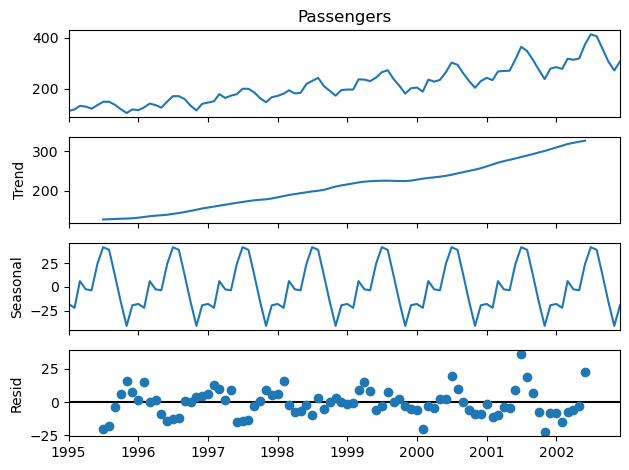

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(airline['Passengers'],period=12)
decompose_ts_add.plot()
plt.show()

Arima Model

In [ ]:
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Month'>

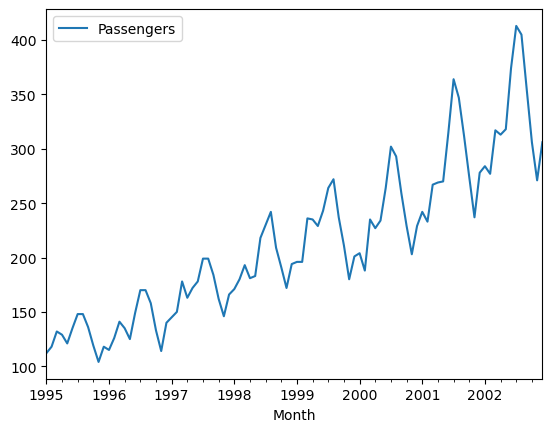

In [ ]:
airline.plot()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(airline)

(0.01, False)

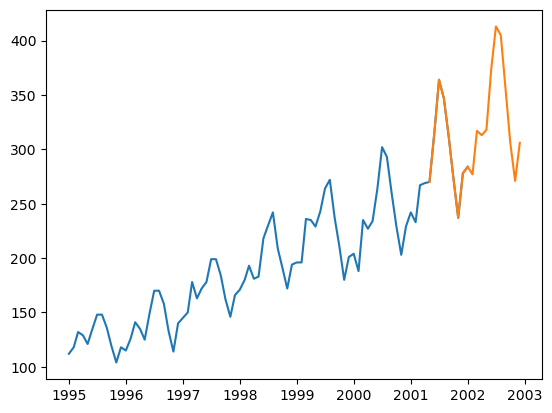

In [ ]:
train = airline.head(85)
test = airline.tail(20)
plt.plot(train)
plt.plot(test)

In [ ]:
import statsmodels.tsa.seasonal
from pmdarima import auto_arima

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Wed, 06 Dec 2023   AIC                            537.388
Time:                                     01:56:16   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
pred.columns = ['predicted_pass']
pred

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


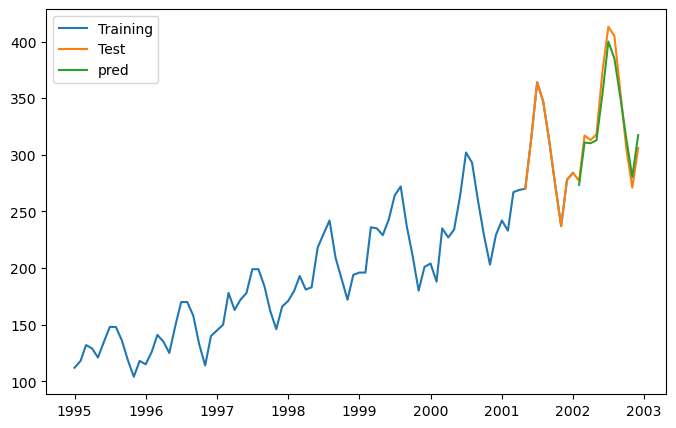

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test,label = 'Test')
plt.plot(pred, label='pred')
plt.legend(loc = 'upper left')
plt.show()

Fitting ARIMA Model

In [ ]:
# separate out a validation dataset
split_point = len(airline) - 10
dataset, validation = airline[0:split_point], airline[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

Dataset 86, Validation 10


In [ ]:
import statsmodels.tsa.seasonal
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
X = train.values
X = X.astype('float32')

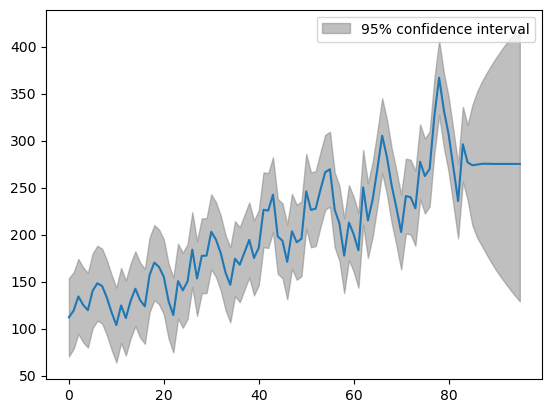

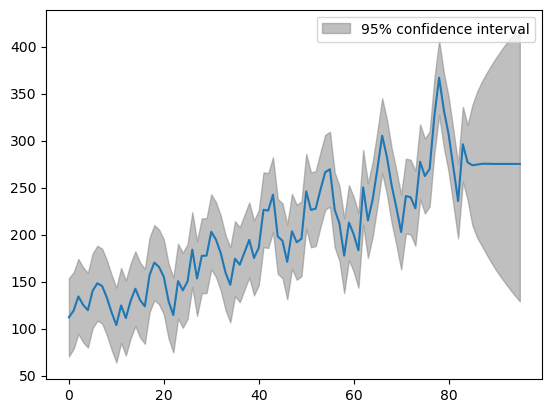

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.arima.ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
plot_predict(model_fit,1,96)

Combine train and test data and build final model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(X, order = (3,1,3))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps=12)
forecast

array([285.00442554, 301.31803743, 310.00994401, 324.04661785,
       327.66541681, 330.76207941, 324.64055694, 318.33225188,
       307.97437658, 300.98275702, 295.03846646, 294.51649823])

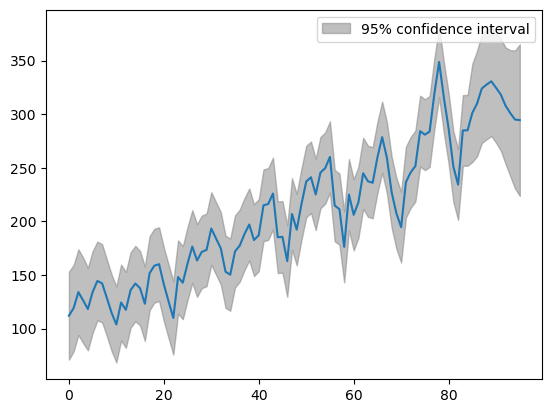

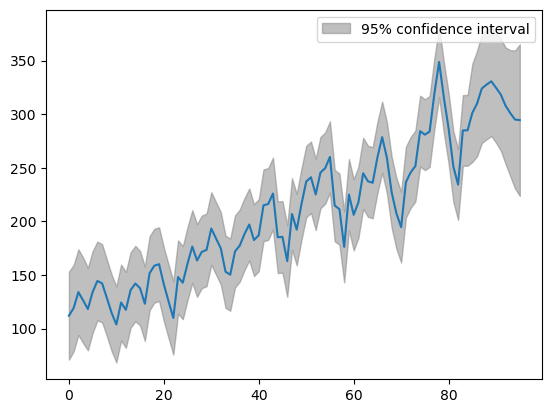

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)